# Linear Regression

In [1]:
from PIL import Image
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('bmh')
matplotlib.rcParams['figure.figsize']=(8,5)

Simple linear regression experiment

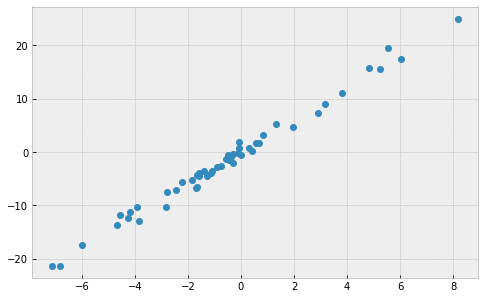

In [2]:
# Generate random samples
X = np.random.normal(0, 3, size=(50,1))
Y = X @ [3] + np.random.normal(0, size=50)
# plot it
plt.plot(X, Y, 'o');

In [3]:
# use  lstsq from numpy
a = np.linalg.lstsq(X, Y)[0]
a

C:\Users\tzerj\AppData\Local\Temp\ipykernel_3712\1122946379.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  a = np.linalg.lstsq(X, Y)[0]


array([2.9962818])

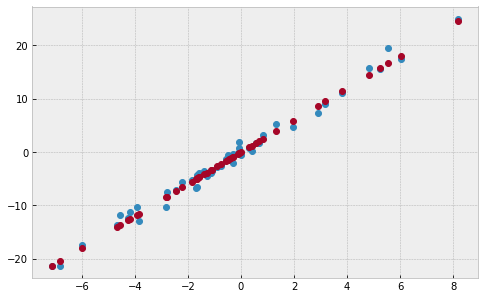

In [4]:
# let us plot it
plt.plot(X, Y, 'o')
plt.plot(X, X @ a, 'o');

## Q 
How to add the bias term?

Hint: Try `np.concatenate`, `np.ones_like`

a= [ 2.96469883 15.19869874]


C:\Users\tzerj\src\NCTU_IOG5017\basic_machine_learning\q_lstsq.py:8: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  a = np.linalg.lstsq(X, Y)[0]


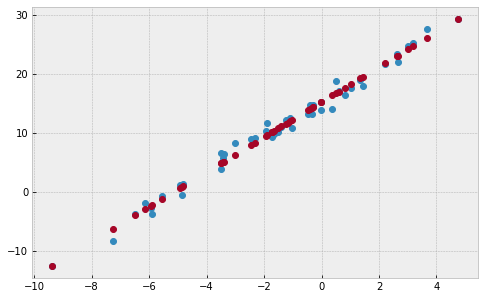

In [5]:
%run -i q_lstsq.py

## sklearn is more suitable for this job

In [6]:
from sklearn import linear_model

In [7]:
X = np.random.normal(0, 3, size=(50,1))
Y = X @ [3] + 4 +np.random.normal(0, size=50)

In [8]:
regr = linear_model.LinearRegression()
regr

LinearRegression()

In [9]:
regr.fit(X,Y)
print(regr.coef_, regr.intercept_)

[2.96671386] 4.21750197482283


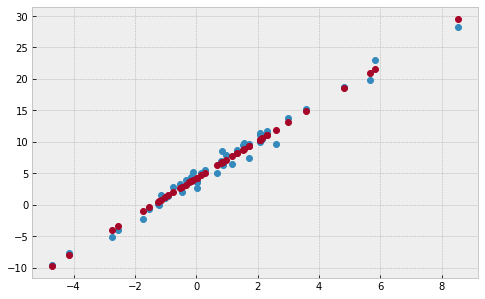

In [10]:
# 畫出來
plt.plot(X, Y, 'o')
plt.plot(X, regr.predict(X), 'o');

## Q
plot `test_X = np.linspace(-10,10, 100)` 

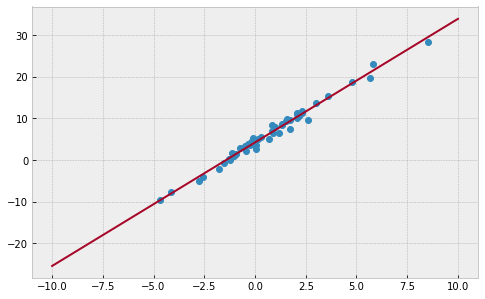

In [11]:
%run -i q_linear_test.py

### Use sklearn datasets to explore toy datasets

In [12]:
from sklearn import datasets

In [13]:
diabetes = datasets.load_diabetes()
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [14]:
import scipy.stats

In [15]:
scipy.stats.describe(diabetes.target)

DescribeResult(nobs=442, minmax=(25.0, 346.0), mean=152.13348416289594, variance=5943.331347923785, skewness=0.43906639932477265, kurtosis=-0.8866436055681386)

In [16]:
idx = np.arange(diabetes.data.shape[0])
np.random.shuffle(idx)
X = diabetes.data[idx]
y = diabetes.target[idx]

試試看 linear regression

3883.4103887656834

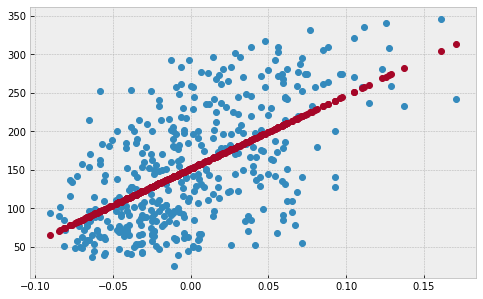

In [17]:
train_X = X[:-50, 2:3]
train_y = y[:-50]
test_X = X[-50:, 2:3]
test_y = y[-50:]
regr = linear_model.LinearRegression()
regr.fit(train_X, train_y)
plt.plot(train_X, train_y, 'o');
plt.plot(train_X, regr.predict(train_X), 'o');
np.mean((regr.predict(train_X)-train_y)**2)

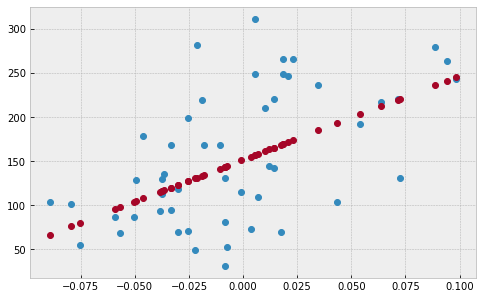

In [18]:
plt.plot(test_X, test_y, 'o');
plt.plot(test_X, regr.predict(test_X), 'o');

### Use all input from X

In [19]:
train_X = X[:-50]
train_y = y[:-50]
test_X = X[-50:]
test_y = y[-50:]
regr = linear_model.LinearRegression()
regr.fit(train_X, train_y)
np.mean((regr.predict(train_X)-train_y)**2)

2902.7899179975516

In [20]:
np.mean((regr.predict(test_X)-test_y)**2)

2539.496524674719

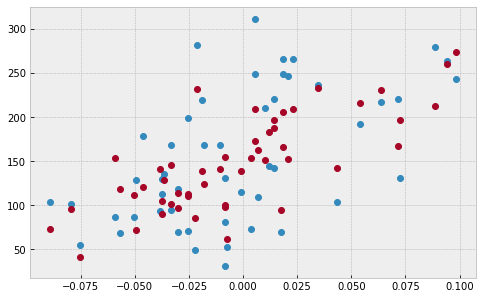

In [21]:
plt.plot(test_X[:, 2:3], test_y, 'o');
plt.plot(test_X[:, 2:3], regr.predict(test_X), 'o');

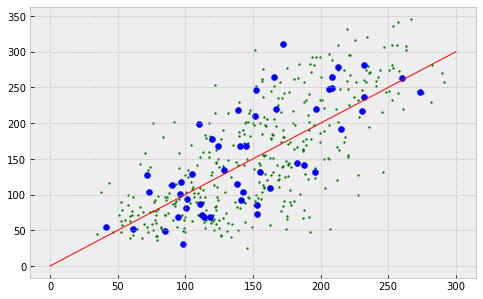

In [22]:
plt.scatter(regr.predict(train_X), train_y, c='g', s=3)
plt.scatter(regr.predict(test_X), test_y, c='b')
plt.plot([0,300],[0,300],'r', linewidth=1);

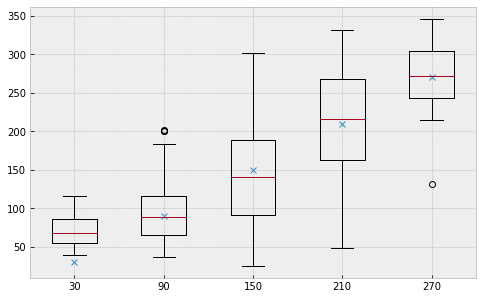

In [23]:
groups = np.arange(30,300,60)
predict_y=regr.predict(train_X)
plt.boxplot([train_y[(predict_y>=i-30)&(predict_y< i+30)] for i in groups], labels=groups);
plt.plot(np.arange(1,len(groups)+1), groups,'x');

## Overfitting

https://tjwei.github.io/NeuralNetwork-Jobspace-slides/#/7

### Regularization
$\frac{1}{2  n} \left\Vert y - Xw\right\Vert_2^2 + α \left\Vert w \right\Vert_1$

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

In [24]:
regr = linear_model.Lasso(alpha=0.001)
regr.fit(train_X, train_y)
np.mean((regr.predict(train_X)-train_y)**2)

2902.984614773461

In [25]:
np.mean((regr.predict(test_X)-test_y)**2)

2542.7688678700583

### Cross validation
https://en.wikipedia.org/wiki/Cross-validation_(statistics)

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

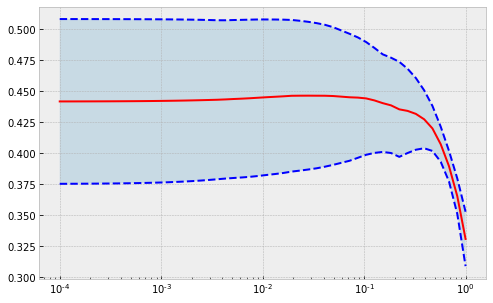

In [26]:
from sklearn import model_selection
α_space = np.logspace(-4, 0, 50)
scores =[]
for α in α_space:    
    regr.alpha = α
    s = model_selection.cross_val_score(regr, train_X, train_y, cv=3)
    scores.append((s.mean(), s.std()))
scores=np.array(scores).T
plt.semilogx(α_space, scores[0], 'r')
plt.semilogx(α_space, scores[0]+scores[1],'b--')
plt.semilogx(α_space, scores[0]-scores[1],'b--')
plt.fill_between(α_space, scores[0] + scores[1], scores[0] - scores[1], alpha=0.2);

### Model selection: LassoCV
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html

$R^2-score$ : https://en.wikipedia.org/wiki/Coefficient_of_determination#Definitions

In [27]:
regr = linear_model.LassoCV(alphas = α_space, cv=5)
regr.fit(train_X, train_y)
print('α=', regr.alpha_)
print("training score:", regr.score(train_X, train_y))
# compute R^2 score from definition
print(1-np.mean((regr.predict(train_X)-train_y)**2)/np.var(train_y))

α= 0.040949150623804234
training score: 0.5103967155828091
0.5103967155828091


In [28]:
print("validation score:", regr.score(test_X, test_y))

validation score: 0.5326726288134727


more about model selection: https://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_model_selection.html#sphx-glr-auto-examples-linear-model-plot-lasso-model-selection-py

### Can we use Linear regression to do classification ?

0.028205951700284393

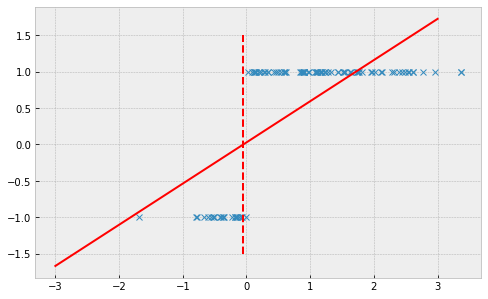

In [29]:
X = np.random.normal(1, size=(100,1))
y = (X[:,0]>0).ravel()*2-1
regr = linear_model.LinearRegression().fit(X, y)
test_X=np.linspace(-3,3,10).reshape(-1,1)
plt.plot(X, y, 'x');
plt.plot(test_X, regr.predict(test_X), 'r')
plt.plot([-regr.intercept_/regr.coef_[0]]*2, [-1.5,1.5], 'r--')
regr.intercept_

In [30]:
regr.intercept_

0.028205951700284393

## MNIST

In [41]:
import gzip
import pickle
with gzip.open('mnist.pkl.gz', 'rb') as f:
    train_set, validation_set, test_set = pickle.load(f, encoding='latin1')
    
train_X, train_y = train_set
test_X, test_y = test_set

In [44]:
from rich import print

In [45]:
regr = linear_model.LinearRegression()
regr.fit(train_X, train_y)
print(regr.predict(test_X))

[6.2860074 2.5287745 1.6647321 ... 7.8060045 5.306857  5.7674417]

In [65]:
predict_y = np.floor(regr.predict(train_X)+0.5).clip(0,9).astype('int')
np.mean(predict_y == train_y)

0.23402

In [66]:
predict_y = np.floor(regr.predict(test_X)+0.5).astype('int').clip(0,9)
np.mean(predict_y == test_y)

0.2274

23% is a pretty poor

### One hot encoding

In [67]:
train_Y = np.zeros(shape=(train_y.shape[0], 10))
train_Y[np.arange(train_y.shape[0]), train_y] = 1

In [72]:
train_y[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=int64)

In [74]:
print(train_Y[:10])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]

In [75]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder()
onehot_encoder.fit(train_y.reshape(-1,1))
onehot_encoder.transform(train_y.reshape(-1,1)).toarray()[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [76]:
# train the model
regr.fit(train_X, train_Y)

# use argmax to find the result
predict_y = np.argmax(regr.predict(train_X), axis=1)
# calculate the accuracy
np.mean(predict_y == train_y)

0.85658

In [82]:
print(np.round(regr.predict(test_X),3) )

[[ 0.027  0.005  0.111 ...  0.903 -0.089  0.086]
 [ 0.223 -0.246  0.801 ... -0.02  -0.03  -0.089]
 [ 0.041  0.743  0.049 ...  0.058 -0.053  0.019]
 ...
 [-0.237 -0.033 -0.    ...  0.157  0.156  0.29 ]
 [-0.052  0.026 -0.061 ... -0.006  0.429 -0.207]
 [ 0.061 -0.136  0.063 ...  0.026 -0.125 -0.046]]

In [85]:
predict_y = np.argmax(regr.predict(test_X), axis=1)
print(predict_y)

[7 2 1 ... 4 5 6]

In [87]:
np.mean(predict_y == test_y)

0.8607

## Q
try test accuracy

In [40]:
%run -i q_minst_linear_regression.py

0.8607


<Figure size 576x360 with 0 Axes>

## Q
How about using PCA first?